# Import Data and Analysis

In [1]:
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

In [2]:
df = pd.read_csv("ATP.csv")

In [3]:
df.tail()

,best_of,draw_size,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_ace,l_bpFaced,l_bpSaved,l_df,...,winner_age,winner_entry,winner_hand,winner_ht,winner_id,winner_ioc,winner_name,winner_rank,winner_rank_points,winner_seed
169685,3,NaN,54.0,43.0,16.0,15.0,13.0,5.0,3.0,1.0,...,22.74,NaN,R,NaN,106426,CHI,Christian Garin,92.0,620.0,NaN
169686,3,NaN,23.0,12.0,5.0,7.0,0.0,8.0,3.0,2.0,...,20.18,NaN,R,NaN,134770,NOR,Casper Ruud,108.0,527.0,NaN
169687,3,NaN,56.0,39.0,13.0,12.0,5.0,5.0,3.0,1.0,...,28.78,NaN,L,185.0,105550,ARG,Guido Pella,48.0,975.0,3.0
169688,3,NaN,34.0,24.0,11.0,10.0,5.0,6.0,3.0,0.0,...,22.74,NaN,R,NaN,106426,CHI,Christian Garin,92.0,620.0,NaN
169689,3,NaN,35.0,26.0,9.0,11.0,5.0,7.0,3.0,4.0,...,28.78,NaN,L,185.0,105550,ARG,Guido Pella,48.0,975.0,3.0


In [4]:
df.shape

(169690, 49)

In [5]:
df['surface'].value_counts()

Hard      67128
Clay      61368
Carpet    19861
Grass     18714
None         80
Name: surface, dtype: int64

# EDA

In [6]:
df.apply(lambda x: sum(x.isnull()),axis=0) # check if missing values are there

best_of                    0
draw_size             168458
l_1stIn                86275
l_1stWon               86275
l_2ndWon               86275
l_SvGms                86275
l_ace                  86275
l_bpFaced              86275
l_bpSaved              86275
l_df                   86275
l_svpt                 86275
loser_age               4990
loser_entry           144351
loser_hand                85
loser_ht               30638
loser_id                   0
loser_ioc                  0
loser_name                 0
loser_rank             23781
loser_rank_points      76665
loser_seed            136837
match_num                  0
minutes                87587
round                      0
score                    176
surface                 2539
tourney_date               0
tourney_id                 0
tourney_level              0
tourney_name               0
w_1stIn                86275
w_1stWon               86275
w_2ndWon               86275
w_SvGms                86275
w_ace         

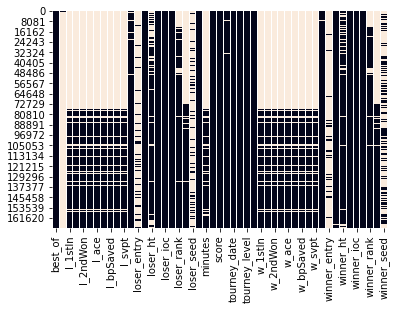

In [7]:
import seaborn as sns
sns.heatmap(df.isnull(), cbar=False)

In [8]:
df.count()

best_of               169690
draw_size               1232
l_1stIn                83415
l_1stWon               83415
l_2ndWon               83415
l_SvGms                83415
l_ace                  83415
l_bpFaced              83415
l_bpSaved              83415
l_df                   83415
l_svpt                 83415
loser_age             164700
loser_entry            25339
loser_hand            169605
loser_ht              139052
loser_id              169690
loser_ioc             169690
loser_name            169690
loser_rank            145909
loser_rank_points      93025
loser_seed             32853
match_num             169690
minutes                82103
round                 169690
score                 169514
surface               167151
tourney_date          169690
tourney_id            169690
tourney_level         169690
tourney_name          169690
w_1stIn                83415
w_1stWon               83415
w_2ndWon               83415
w_SvGms                83415
w_ace         

In [9]:
df["score"].isna().sum()

176

In [10]:
#We can delete the row with NaN score (0.1% of data)
#we will drop the rows with "W/O" score (0.43 % of data)
data_drop_nanScore = df.dropna(axis=0, subset=["score"])
data_drop_nanScore = data_drop_nanScore[data_drop_nanScore["score"] != 'W/O']
data_drop_nanScore = data_drop_nanScore[data_drop_nanScore["score"] != ' W/O']
data_drop_nanScore = data_drop_nanScore[data_drop_nanScore["score"] != 'DEF']
data_drop_nanScore = data_drop_nanScore[data_drop_nanScore["score"] != 'In Progress']
data_drop_nanScore = data_drop_nanScore[data_drop_nanScore["score"] != 'Walkover']
# we observed some scores having weird format (example 6-Feb)
#This line below is to drop them
expression = re.compile("\d+-[a-zA-Z]+")
weird_score = [x for x in data_drop_nanScore.score.values.tolist() if re.search(expression, x)]
for s in weird_score:
    data_drop_nanScore = data_drop_nanScore[data_drop_nanScore["score"] != s]  

# We kept ~99% of the initial data
display(data_drop_nanScore.shape)

(168516, 49)

In [11]:
data_drop_nanScore.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168516 entries, 0 to 169689
Data columns (total 49 columns):
best_of               168516 non-null int64
draw_size             1163 non-null float64
l_1stIn               83410 non-null float64
l_1stWon              83410 non-null float64
l_2ndWon              83410 non-null float64
l_SvGms               83410 non-null float64
l_ace                 83410 non-null float64
l_bpFaced             83410 non-null float64
l_bpSaved             83410 non-null float64
l_df                  83410 non-null float64
l_svpt                83410 non-null float64
loser_age             163654 non-null float64
loser_entry           25303 non-null object
loser_hand            168432 non-null object
loser_ht              138270 non-null float64
loser_id              168516 non-null int64
loser_ioc             168516 non-null object
loser_name            168516 non-null object
loser_rank            145151 non-null float64
loser_rank_points     92610 non-nul

In [12]:
df = data_drop_nanScore.dropna(axis=0, subset=['l_1stIn','l_1stWon','l_2ndWon','l_SvGms','l_ace','l_bpFaced','l_bpSaved','l_df','l_svpt','w_1stIn','w_1stWon','w_2ndWon','w_SvGms','w_ace','w_bpFaced','w_bpSaved','w_df','w_svpt'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83410 entries, 76801 to 169689
Data columns (total 49 columns):
best_of               83410 non-null int64
draw_size             0 non-null float64
l_1stIn               83410 non-null float64
l_1stWon              83410 non-null float64
l_2ndWon              83410 non-null float64
l_SvGms               83410 non-null float64
l_ace                 83410 non-null float64
l_bpFaced             83410 non-null float64
l_bpSaved             83410 non-null float64
l_df                  83410 non-null float64
l_svpt                83410 non-null float64
loser_age             83360 non-null float64
loser_entry           17954 non-null object
loser_hand            83382 non-null object
loser_ht              78691 non-null float64
loser_id              83410 non-null int64
loser_ioc             83410 non-null object
loser_name            83410 non-null object
loser_rank            83049 non-null float64
loser_rank_points     82108 non-null float6

### Draw_Size

In [14]:
df.drop('draw_size', axis=1, inplace=True)

C:\Users\Neil\Anaconda3\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


## Loser player columns

### Loser_Age

C:\Users\Neil\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


Text(0.5, 1.0, 'loser_age distribution')

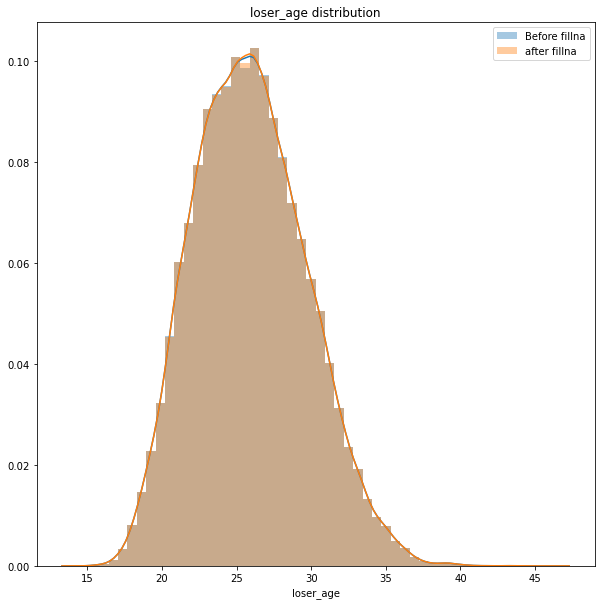

In [15]:
#loser_age: The best solutipon is to fill NaN values with the median.
# The column distribution agree with our choice
# loser_age before modification
n_Nan_l_age = df.dropna(axis=0, subset=["loser_age"])["loser_age"]
plt.figure(figsize=(10,10))
sns.distplot(n_Nan_l_age)

# Fill Nan with the median
median_loser_age = n_Nan_l_age.median()
df["loser_age"] = df["loser_age"]\
                                          .fillna(median_loser_age)

# loser_age after modification (fillna)

sns.distplot(df["loser_age"])
plt.legend(labels=['Before fillna','after fillna'])
plt.title("loser_age distribution")

### loser_entry

In [16]:
df = df.drop(labels=["loser_entry"], axis=1)

### loser_hand

In [17]:
df["loser_hand"].value_counts()

R    70577
L    12360
U      445
Name: loser_hand, dtype: int64

In [18]:
# Get the loser with nan loser_hand
nan_hand_names = df[df["loser_hand"]\
                            .isnull()]["loser_name"].unique()
print(nan_hand_names)

# See if the loser_hand is defined for another game
# when the player is a loser
for name in nan_hand_names:
    hands = df[df["loser_name"] == name]["loser_hand"]
    if hands.isnull().all() == False:
        print("loser_hand founded for loser_name" + name)
# when the player is a winner
for name in nan_hand_names:
    hands = df[df["winner_name"] == name]["winner_hand"]
    if hands.isnull().all() == False:
        print("loser_hand founded for winner_name" + name)

['Adam Hornby' 'Jose Olivares' 'Bruno Britez'
 'Hernando Jose Escurra Isnardi' 'Alex Diaz' 'Sebastian Arcila'
 'Sebastian Quiros' 'Alex Knaff' 'Dac Tien Nguyen' 'Illia Biloborodko'
 'Matthew Foster Estwick' 'Xavier Lawrence' 'Minjong Park'
 'Ainius Sabaliauskas' 'Ignacio Garcia' 'Christophe Tholl'
 'Yasitha De Silva']


In [19]:
max_loser_hand = df["loser_hand"].value_counts().idxmax()
df["loser_hand"] = df["loser_hand"]\
                                .fillna(max_loser_hand)

In [20]:
df["loser_hand"].value_counts()

R    70605
L    12360
U      445
Name: loser_hand, dtype: int64

### loser_ht

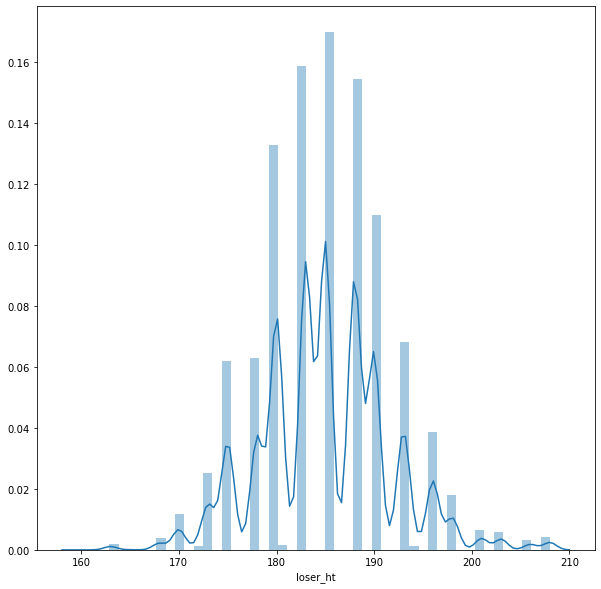

In [21]:
n_Nan_l_ht = df.dropna(axis=0, subset=["loser_ht"])["loser_ht"]
plt.figure(figsize=(10,10))
sns.distplot(n_Nan_l_ht)

In [22]:
df.describe()["loser_ht"]

count    78691.000000
mean       184.954162
std          6.596895
min        160.000000
25%        180.000000
50%        185.000000
75%        188.000000
max        208.000000
Name: loser_ht, dtype: float64

In [23]:
# Get the loser with nan loser_ht
nan_ht_names = df[df["loser_ht"]\
                                .isnull()]["loser_name"].unique()
print(nan_ht_names)

# See if the loser_ht is defined for another game
# when the player is a loser
for name in nan_ht_names:
    ht = df[df["loser_name"] == name]["loser_ht"]
    if ht.isnull().all() == False:
        print("loser_ht founded for loser_name" + name)
# when the player is a winner
for name in nan_hand_names:
    ht = df[df["winner_name"] == name]["winner_ht"]
    if ht.isnull().all() == False:
        print("loser_ht founded for loser_name" + name)

['John Arbanas' 'Roberto Raffa' 'Sebastian Soresini'
 'Toshihisa Tsuchihashi' 'Kentaro Masuda' 'Jae Sik Kim' 'Han Cheol Shin'
 'Seung Ho Ji' 'Emanuel Rasberger' 'Jose Antonio Fernandez' 'Silvio Moine'
 'Bruce Steel' 'Ian Aler' 'Reinhard Wawra' 'Lukas Thomas' 'Milan Trneny'
 'Phillip Williamson' 'Bertrand Madsen' 'William Kyriakos' 'Rodrigo Faria'
 'Miguel Merz' 'Martin Schaffl' 'Milen Velev' 'Tasos Bavelas'
 'Ohad Weinberg' 'Hidehiko Tanizawa' 'Ryuso Tsujino' 'Serge Soulie'
 'Sergej Skakun' 'Axel Finnberg' 'Juan Pablo Etchecoin' 'Hyeong Keun Song'
 'Francesco Michelotti' 'Jordi Mas' 'Alexander Windisch' 'Dick Bosse'
 'Roberto Alvarez' 'Thierry Van Den Daele' 'Jorg Schors' 'Andreas Fikas'
 'Talito Corrales' 'Gil Kovalski' 'Hideki Kaneko' 'Fabien Cousin'
 'Cheng Fong Chang' 'Chih Jung Chen' 'Yu Hui Lien' 'Andrew Mclean'
 'Ashley Naumann' 'Michael Shyjan' 'Ralph Kok' 'Juan Luis Tati Rascon'
 'Christian Camradt' 'Mohamed Ridaoui' 'Guillaume Marx' 'Rene Nicklisch'
 'Sean Cole' 'Patrik Langv

In [24]:
df["loser_ht"].mean()

184.95416248363853

In [25]:
mean_loser_ht = df["loser_ht"].mean()
df["loser_ht"] = df["loser_ht"]\
                            .fillna(mean_loser_ht)

### loser_seed

In [26]:
print(df["loser_seed"].isnull().sum())
df = df.drop(labels=["loser_seed"], axis=1)

63414


### match_num

In [27]:
df = df.drop(labels=["match_num"], axis=1)

### minutes

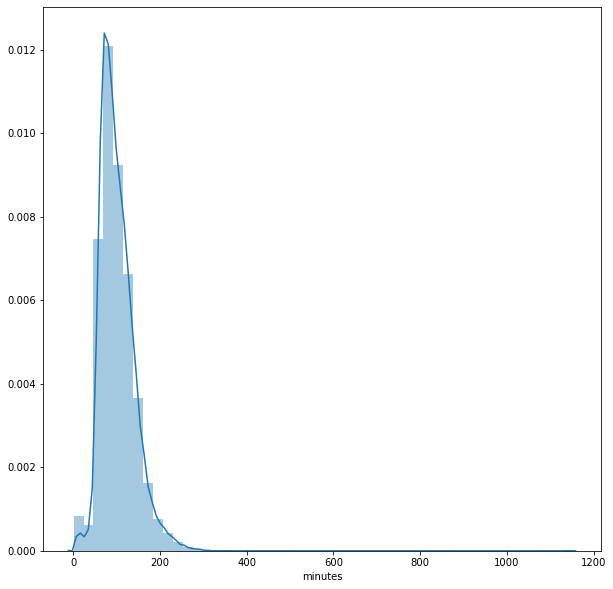

In [28]:
n_Nan_minutes = df.dropna(axis=0, subset=["minutes"])["minutes"]
plt.figure(figsize=(10,10))
sns.distplot(n_Nan_minutes)

# Fill Nan with the median
mean_minutes = n_Nan_minutes.mean()
df["minutes"] = df["minutes"]\
                            .fillna(mean_minutes)

## Winner player columns

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83410 entries, 76801 to 169689
Data columns (total 45 columns):
best_of               83410 non-null int64
l_1stIn               83410 non-null float64
l_1stWon              83410 non-null float64
l_2ndWon              83410 non-null float64
l_SvGms               83410 non-null float64
l_ace                 83410 non-null float64
l_bpFaced             83410 non-null float64
l_bpSaved             83410 non-null float64
l_df                  83410 non-null float64
l_svpt                83410 non-null float64
loser_age             83410 non-null float64
loser_hand            83410 non-null object
loser_ht              83410 non-null float64
loser_id              83410 non-null int64
loser_ioc             83410 non-null object
loser_name            83410 non-null object
loser_rank            83049 non-null float64
loser_rank_points     82108 non-null float64
minutes               83410 non-null float64
round                 83410 non-null o

### winner_age

Text(0.5, 1.0, 'winner_age distribution')

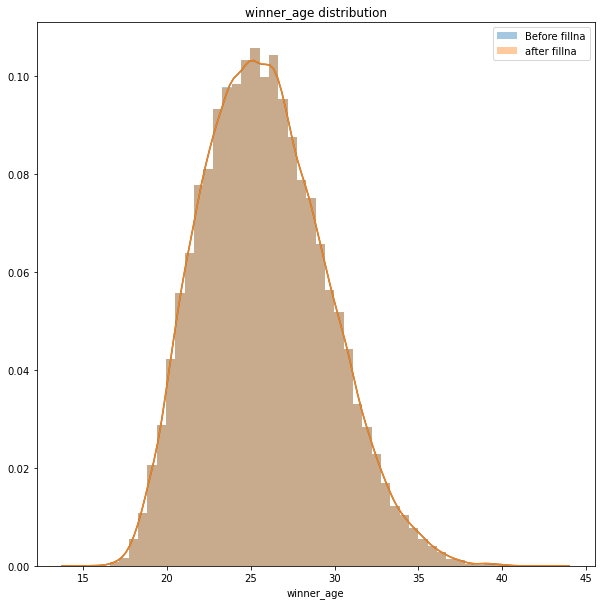

In [30]:
#winner_age: The best solutipon is to fill NaN values with the median.
n_Nan_w_age = df.dropna(axis=0, subset=["winner_age"])["winner_age"]
plt.figure(figsize=(10,10))
sns.distplot(n_Nan_w_age)

# Fill Nan with the median
median_winner_age = n_Nan_w_age.median()
df["winner_age"] = df["winner_age"]\
                                .fillna(median_winner_age)

# loser_age after modification (fillna)

sns.distplot(df["winner_age"])
plt.legend(labels=['Before fillna','after fillna'])
plt.title("winner_age distribution")

### winner_entry

In [31]:
# We choose to drop loser_entry column (no clear method to fill nan values)
df = df.drop(labels=["winner_entry"], axis=1)

### winner_hand

In [32]:
df["winner_hand"].value_counts()

R    71316
L    11899
U      187
Name: winner_hand, dtype: int64

In [33]:
# Get the loser with nan loser_hand
nan_hand_names = df[df["winner_hand"]\
.isnull()]["winner_name"].unique()
print(nan_hand_names)

# See if the winner_hand is defined for another game
# when the player is a loser
verify_name = []
for name in nan_hand_names:
    hands = df[df["loser_name"] == name]["loser_hand"]
    if hands.isnull().all() == False:
        verify_name.append(name)
        print("loser_hand founded for winner_name" + name)
# when the player is a winner
for name in nan_hand_names:
    hands = df[df["winner_name"] == name]["winner_hand"]
    if hands.isnull().all() == False:
        verify_name.append(name)
        print("loser_hand founded for winner_name" + name)

['Sebastian Arcila' 'Ignacio Garcia' 'Bruno Britez'
 'Jean Jacques Rakotohasy' 'Hady Habib']
loser_hand founded for winner_nameSebastian Arcila
loser_hand founded for winner_nameIgnacio Garcia
loser_hand founded for winner_nameBruno Britez


In [34]:
for name in verify_name:
    for row_index in df[df["winner_name"] == name].index:
        df.loc[row_index,'winner_hand'] = "R"

In [35]:
max_winner_hand = df["winner_hand"].value_counts().idxmax()
df["winner_hand"] = df["winner_hand"]\
                                    .fillna(max_winner_hand)

In [36]:
df["winner_hand"].value_counts()

R    71324
L    11899
U      187
Name: winner_hand, dtype: int64

### winner_ht

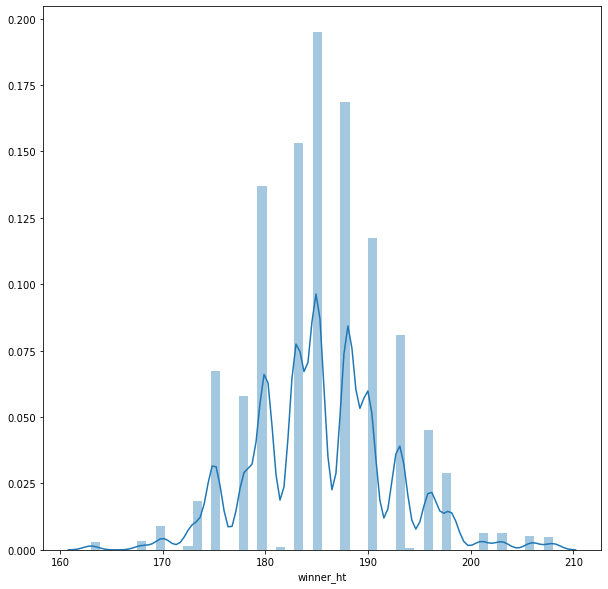

In [37]:
n_Nan_w_ht = df.dropna(axis=0, subset=["winner_ht"])["winner_ht"]
plt.figure(figsize=(10,10))
sns.distplot(n_Nan_w_ht)

In [38]:
df.describe()["winner_ht"]

count    80711.000000
mean       185.443793
std          6.661710
min        163.000000
25%        180.000000
50%        185.000000
75%        190.000000
max        208.000000
Name: winner_ht, dtype: float64

In [39]:
# Get the loser with nan loser_ht
nan_ht_names = df[df["winner_ht"]\
                                .isnull()]["winner_name"].unique()
print(nan_ht_names)

# See if the loser_ht is defined for another game
# when the player is a loser
# save in verify_name, the players that already have a ht
verify_name = []
for name in nan_ht_names:
    ht = df[df["loser_name"] == name]["loser_ht"]
    if ht.isnull().all() == False:
#         print(ht)
        verify_name.append(name)
        print("loser_ht founded for winner_name " + name)
# when the player is a winner
for name in nan_hand_names:
    ht = df[df["winner_name"] == name]["winner_ht"]
    if ht.isnull().all() == False:
        verify_name.append(name)
        print("winner_ht founded for winner_name " + name)

['Seung Ho Ji' 'Miguel Merz' 'Milen Velev' 'Ralph Kok' 'Hideki Kaneko'
 'Han Cheol Shin' 'Nicolas Kischkewitz' 'Ryuso Tsujino' 'Axel Finnberg'
 'Juan Luis Tati Rascon' 'Bill Barber' 'Mario Rincon' 'Gilles Bastie'
 'Howard Joffe' 'Kotaro Miyachi' 'Colin Beecher' 'Alexandre Strambini'
 'Daniele Balducci' 'Nir Welgreen' 'Filippo Veglio' 'Federico Dondo'
 'Marcus Hilpert' 'Jordi Mas' 'Igor Kornienko' 'Solon Peppas'
 'Dejan Petrovic' 'Kalle Flygt' 'Lee Childs' 'Johan Ortegren'
 'Jonas Froberg' 'Takahiro Terachi' 'Hiroki Kondo' 'Mounir El Aarej'
 'Thomas Blake' 'Maximilian Abel' 'Diogo Rocha' 'Jonathan Marray'
 'Ian Flanagan' 'Hao Lu' 'Matias Boeker' 'Ben Qiang Zhu' 'Todd Widom'
 'Peng Sun' 'Yu Jr Wang' 'Gustavo Marcaccio' 'Jorge Aguilar'
 'Mohammad Ghareeb' 'Slimane Saoudi' 'Stefano Ianni' 'Luka Gregorc'
 'James Auckland' 'Gianluca Naso' 'Augustin Gensse' 'Laurent Recouderc'
 'Jamie Baker' 'Gabriel Trujillo Soler' 'Samuel Groth' 'Chris Eaton'
 'Ervin Eleskovic' 'Rafael Arevalo' 'Adrian Cruc

loser_ht founded for winner_name Dimitar Kutrovsky
loser_ht founded for winner_name Facundo Bagnis
loser_ht founded for winner_name Sergio Gutierrez Ferrol
loser_ht founded for winner_name Inigo Cervantes Huegun
loser_ht founded for winner_name Mate Pavic
loser_ht founded for winner_name Marco Trungelliti
loser_ht founded for winner_name Philipp Oswald
loser_ht founded for winner_name Dennis Novikov
loser_ht founded for winner_name Clement Reix
loser_ht founded for winner_name Hiroki Moriya
loser_ht founded for winner_name Patrik Rosenholm
loser_ht founded for winner_name Christian Garin
loser_ht founded for winner_name Matteo Viola
loser_ht founded for winner_name Martin Alund
loser_ht founded for winner_name Rhyne Williams
loser_ht founded for winner_name Henri Laaksonen
loser_ht founded for winner_name Mirza Basic
loser_ht founded for winner_name Kyle Edmund
loser_ht founded for winner_name Jan Lennard Struff
loser_ht founded for winner_name Nils Langer
loser_ht founded for winner_n

loser_ht founded for winner_name Joao Domingues
loser_ht founded for winner_name Yannick Hanfmann
loser_ht founded for winner_name Benjamin Bonzi
loser_ht founded for winner_name Stefano Napolitano
loser_ht founded for winner_name Daniel Altmaier
loser_ht founded for winner_name Cameron Norrie
loser_ht founded for winner_name Sebastian Ofner
loser_ht founded for winner_name Akira Santillan
loser_ht founded for winner_name Christopher Eubanks
loser_ht founded for winner_name Gleb Sakharov
loser_ht founded for winner_name Miljan Zekic
loser_ht founded for winner_name Tennys Sandgren
loser_ht founded for winner_name Mitchell Krueger
loser_ht founded for winner_name Stefano Travaglia
loser_ht founded for winner_name Markus Eriksson
loser_ht founded for winner_name Viktor Galovic
loser_ht founded for winner_name Yannick Maden
loser_ht founded for winner_name Stefanos Tsitsipas
loser_ht founded for winner_name Michael Mmoh
loser_ht founded for winner_name Matteo Berrettini
loser_ht founded f

In [40]:
# affect to players in verify_name the mean_loser_ht
for name in verify_name:
    for row_index in df[df["winner_name"] == name].index:
        df.loc[row_index,'winner_ht'] = mean_loser_ht

In [41]:
mean_winner_ht = df["winner_ht"].mean()
df["winner_ht"] = df["winner_ht"]\
                                .fillna(mean_winner_ht)

### winner_seed

In [42]:
print(df["winner_seed"].isnull().sum())
df = df.drop(labels=["winner_seed"], axis=1)

46475


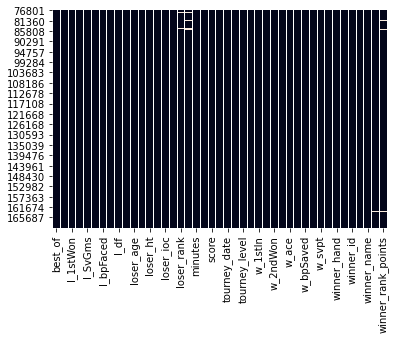

In [43]:
import seaborn as sns
sns.heatmap(df.isnull(), cbar=False)

# Organize the data

In [45]:
df.tail()

,best_of,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_ace,l_bpFaced,l_bpSaved,l_df,l_svpt,...,w_df,w_svpt,winner_age,winner_hand,winner_ht,winner_id,winner_ioc,winner_name,winner_rank,winner_rank_points
169685,3,54.0,43.0,16.0,15.0,13.0,5.0,3.0,1.0,83.0,...,2.0,92.0,22.74,R,184.954162,106426,CHI,Christian Garin,92.0,620.0
169686,3,23.0,12.0,5.0,7.0,0.0,8.0,3.0,2.0,40.0,...,1.0,40.0,20.18,R,184.954162,134770,NOR,Casper Ruud,108.0,527.0
169687,3,56.0,39.0,13.0,12.0,5.0,5.0,3.0,1.0,80.0,...,1.0,76.0,28.78,L,185.000000,105550,ARG,Guido Pella,48.0,975.0
169688,3,34.0,24.0,11.0,10.0,5.0,6.0,3.0,0.0,57.0,...,3.0,57.0,22.74,R,184.954162,106426,CHI,Christian Garin,92.0,620.0
169689,3,35.0,26.0,9.0,11.0,5.0,7.0,3.0,4.0,65.0,...,2.0,65.0,28.78,L,185.000000,105550,ARG,Guido Pella,48.0,975.0


In [46]:
#dataframe winner
columns_w = [
    "best_of", "w_1stIn", "w_1stWon", "w_2ndWon", "w_SvGms", "w_ace", "w_bpFaced", "w_bpSaved",
    "w_df", "w_svpt", "winner_age", "winner_hand", "winner_ht", "winner_id", "winner_ioc",
    "winner_name", "winner_rank", "winner_rank_points", "minutes", "round", "score",
    "surface", "tourney_date", "tourney_id", "tourney_level", "tourney_name" ]
df_w = df[columns_w]
df_w["label"] = 1

C:\Users\Neil\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [47]:
# dataframe loser
df_l = df.copy()
df_l = df_l.iloc[:,:26]
df_l.columns = columns_w
df_l["label"] = 0

In [48]:
# players datafame
player_df = pd.concat([df_w, df_l], ignore_index=True)
player_df.head()

,best_of,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_ace,w_bpFaced,w_bpSaved,w_df,w_svpt,...,winner_rank_points,minutes,round,score,surface,tourney_date,tourney_id,tourney_level,tourney_name,label
0,3,55.0,39.0,25.0,15.0,6.0,4.0,2.0,2.0,96.0,...,NaN,130.0,R32,6-4 3-6 7-6(2),Hard,19901231,1991-339,A,Adelaide,1
1,3,56.0,45.0,25.0,15.0,19.0,10.0,9.0,4.0,101.0,...,NaN,119.0,R32,6-3 3-6 7-6(6),Hard,19901231,1991-339,A,Adelaide,1
2,3,31.0,24.0,13.0,8.0,6.0,1.0,1.0,1.0,54.0,...,NaN,71.0,R32,6-0 6-4,Hard,19901231,1991-339,A,Adelaide,1
3,3,40.0,30.0,14.0,9.0,2.0,3.0,3.0,0.0,60.0,...,NaN,85.0,R32,7-6(2) 6-1,Hard,19901231,1991-339,A,Adelaide,1
4,3,40.0,33.0,14.0,10.0,4.0,8.0,7.0,2.0,72.0,...,NaN,90.0,R32,7-5 6-3,Hard,19901231,1991-339,A,Adelaide,1


### III. Handle with categorical features

In [49]:
player_df.dtypes

best_of                 int64
w_1stIn               float64
w_1stWon              float64
w_2ndWon              float64
w_SvGms               float64
w_ace                 float64
w_bpFaced             float64
w_bpSaved             float64
w_df                  float64
w_svpt                float64
winner_age            float64
winner_hand            object
winner_ht             float64
winner_id               int64
winner_ioc             object
winner_name            object
winner_rank           float64
winner_rank_points    float64
minutes               float64
round                  object
score                  object
surface                object
tourney_date            int64
tourney_id             object
tourney_level          object
tourney_name           object
label                   int64
dtype: object

In [50]:
player_df["round"].value_counts()

R32     60312
R16     31164
R64     27736
R128    16914
QF      15618
SF       7950
F        4040
RR       3082
BR          4
Name: round, dtype: int64

In [51]:
player_df = player_df[player_df["round"] != 'RR']
player_df = player_df[player_df["round"] != 'BR']

In [52]:
player_df["round"].value_counts()

R32     60312
R16     31164
R64     27736
R128    16914
QF      15618
SF       7950
F        4040
Name: round, dtype: int64

In [53]:
df_round = pd.get_dummies(player_df['round'])

In [54]:
player_df = pd.concat([player_df,df_round],  sort = False, axis = 1)

In [55]:
player_df["round"].value_counts()

R32     60312
R16     31164
R64     27736
R128    16914
QF      15618
SF       7950
F        4040
Name: round, dtype: int64

In [56]:
player_df

,best_of,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_ace,w_bpFaced,w_bpSaved,w_df,w_svpt,...,tourney_level,tourney_name,label,F,QF,R128,R16,R32,R64,SF
0,3,55.0,39.0,25.0,15.0,6.0,4.0,2.0,2.0,96.0,...,A,Adelaide,1,0,0,0,0,1,0,0
1,3,56.0,45.0,25.0,15.0,19.0,10.0,9.0,4.0,101.0,...,A,Adelaide,1,0,0,0,0,1,0,0
2,3,31.0,24.0,13.0,8.0,6.0,1.0,1.0,1.0,54.0,...,A,Adelaide,1,0,0,0,0,1,0,0
3,3,40.0,30.0,14.0,9.0,2.0,3.0,3.0,0.0,60.0,...,A,Adelaide,1,0,0,0,0,1,0,0
4,3,40.0,33.0,14.0,10.0,4.0,8.0,7.0,2.0,72.0,...,A,Adelaide,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166815,3,54.0,43.0,16.0,15.0,13.0,5.0,3.0,1.0,83.0,...,A,Sao Paulo,0,0,1,0,0,0,0,0
166816,3,23.0,12.0,5.0,7.0,0.0,8.0,3.0,2.0,40.0,...,A,Sao Paulo,0,0,1,0,0,0,0,0
166817,3,56.0,39.0,13.0,12.0,5.0,5.0,3.0,1.0,80.0,...,A,Sao Paulo,0,0,0,0,0,0,0,1
166818,3,34.0,24.0,11.0,10.0,5.0,6.0,3.0,0.0,57.0,...,A,Sao Paulo,0,0,0,0,0,0,0,1


In [57]:
player_df.drop(["score"], axis=1, inplace=True)

### surface

In [58]:
player_df["surface"].value_counts()

Hard      81360
Clay      53846
Grass     16974
Carpet    11554
Name: surface, dtype: int64

In [59]:
df_surface = pd.get_dummies(player_df['surface'])
player_df = pd.concat([player_df,df_surface],  sort = False, axis = 1)

### tourney_date, tourney_id and tourney_name

In [60]:
player_df.drop(["tourney_date"], axis=1, inplace=True)
player_df.drop(["tourney_id"], axis=1, inplace=True)
player_df.drop(["tourney_name"], axis=1, inplace=True)

### tourney_level

In [61]:
player_df["tourney_level"].value_counts()

A    104580
M     30918
G     28078
F       158
Name: tourney_level, dtype: int64

In [62]:
df_tourn = pd.get_dummies(player_df['tourney_level'])
player_df = pd.concat([player_df,df_tourn],  sort = False, axis = 1)

### Winner_hand, winner_id, winner_name and winner_ioc

In [63]:
player_df["winner_hand"].value_counts()

R    139355
L     23975
U       404
Name: winner_hand, dtype: int64

In [64]:
df_winner_hand = pd.get_dummies(player_df['winner_hand'])
player_df = pd.concat([player_df,df_winner_hand],  sort = False, axis = 1)

In [65]:
player_df.drop(["winner_id"], axis=1, inplace=True)
player_df.drop(["winner_name"], axis=1, inplace=True)

In [66]:
player_df["winner_ioc"].value_counts()

ESP    19834
USA    18647
FRA    14620
GER    11130
ARG     9079
       ...  
MKD        3
IRI        2
AZE        1
VIE        1
TOG        1
Name: winner_ioc, Length: 93, dtype: int64

In [67]:
lb_encoder = LabelEncoder()
player_df['winner_ioc'] = lb_encoder.fit_transform(player_df['winner_ioc'].astype(str))

In [68]:
player_df["winner_ioc"].value_counts()

28    19834
87    18647
31    14620
34    11130
1      9079
      ...  
57        3
41        2
80        1
5         1
90        1
Name: winner_ioc, Length: 93, dtype: int64

In [69]:
removeCat = ['round','winner_hand','tourney_level','surface']

In [70]:
player_df.drop(removeCat,axis = 1,inplace = True)

# Modeling

In [71]:
player_df['label'].value_counts() # Balanced data --- we can use accuracy metric 

1    81867
0    81867
Name: label, dtype: int64

In [72]:
player_df.columns

Index(['best_of', 'w_1stIn', 'w_1stWon', 'w_2ndWon', 'w_SvGms', 'w_ace',
       'w_bpFaced', 'w_bpSaved', 'w_df', 'w_svpt', 'winner_age', 'winner_ht',
       'winner_ioc', 'winner_rank', 'winner_rank_points', 'minutes', 'label',
       'F', 'QF', 'R128', 'R16', 'R32', 'R64', 'SF', 'Carpet', 'Clay', 'Grass',
       'Hard', 'A', 'F', 'G', 'M', 'L', 'R', 'U'],
      dtype='object')

In [73]:
X = player_df.drop(['label','winner_rank','winner_rank_points'],axis=1)

In [74]:
X.columns

Index(['best_of', 'w_1stIn', 'w_1stWon', 'w_2ndWon', 'w_SvGms', 'w_ace',
       'w_bpFaced', 'w_bpSaved', 'w_df', 'w_svpt', 'winner_age', 'winner_ht',
       'winner_ioc', 'minutes', 'F', 'QF', 'R128', 'R16', 'R32', 'R64', 'SF',
       'Carpet', 'Clay', 'Grass', 'Hard', 'A', 'F', 'G', 'M', 'L', 'R', 'U'],
      dtype='object')

In [75]:
y = player_df["label"]

In [76]:
#Split train/test 90%-10%
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, stratify = y) #10%
#split raw data
display(X_train.shape)
display(y_train.shape)

(130987, 32)

(130987,)

### XGBoost

In [77]:
pipeline = Pipeline([
    ('scaler',MinMaxScaler()),
    ('xgb', XGBClassifier())
])


param_grid = {
    'xgb__max_depth': [4],
    'xgb__min_child_weight':[0.01],
    'xgb__colsample_bytree':[0.7],
    'xgb__subsample':[0.6],
    'xgb__learning_rate':[0.1]
}

cv = 2

xgb_grid = GridSearchCV(pipeline, param_grid = param_grid, cv = cv, verbose=1, n_jobs = -1,scoring='accuracy')

xgb_grid.fit(X_train, y_train)

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   46.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   46.3s finished


GridSearchCV(cv=2, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        MinMaxScaler(copy=True,
                                                     feature_range=(0, 1))),
                                       ('xgb',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      gamma=None, gpu_id=None,
                                                      importance_type='gain',
                                                      interaction_constraints=None,
                                                      learning_rate=N

In [78]:
xgb_grid.best_score_

0.8022475272012157

In [79]:
y_pred = xgb_grid.predict(X_test)

In [80]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7975387058356491

In [82]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = ["0", "1"]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Confusion matrix, without normalization
[[13280  3094]
 [ 3536 12837]]


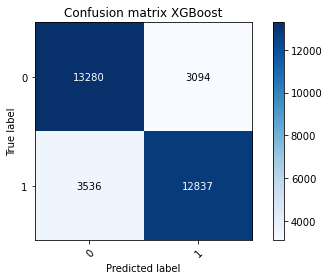

In [83]:
# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=["class_names"],
                      title='Confusion matrix XGBoost')

In [88]:
from sklearn.metrics import roc_auc_score, roc_curve
roc_auc_score(y_test, y_pred)

0.7975382934741438

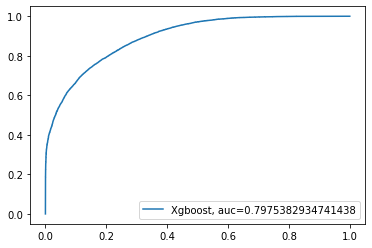

In [89]:
y_pred_proba = xgb_grid.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="Xgboost, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### Logistic Regression

In [90]:
pipeline = Pipeline([
    ('scaler',MinMaxScaler()),
    ('lr', LogisticRegression())
])


param_grid = {
    'lr__penalty' : ['l1', 'l2'],
    'lr__C' : [0.1]
}

cv = 2

lr_grid = GridSearchCV(pipeline, param_grid = param_grid, cv = cv, verbose=1, n_jobs = -1,scoring='accuracy')

lr_grid.fit(X_train, y_train)

Fitting 2 folds for each of 2 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    5.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    5.4s finished
C:\Users\Neil\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


GridSearchCV(cv=2, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        MinMaxScaler(copy=True,
                                                     feature_range=(0, 1))),
                                       ('lr',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=100,
                                                           multi_class='auto',
                                                           n_jobs=None,
          

In [91]:
lr_grid.best_score_

0.7976134948758511

In [92]:
y_pred = lr_grid.predict(X_test)

In [93]:
accuracy_score(y_test, y_pred)

0.7956759397807432

Confusion matrix, without normalization
[[12788  3586]
 [ 3105 13268]]


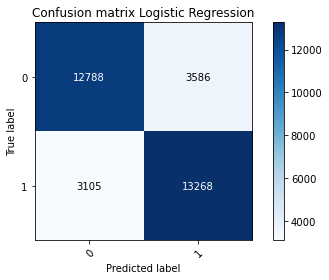

In [95]:
# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=["class_names"],
                      title='Confusion matrix Logistic Regression')

In [96]:
from sklearn.metrics import roc_auc_score, roc_curve
roc_auc_score(y_test, y_pred)

0.7956763881310941

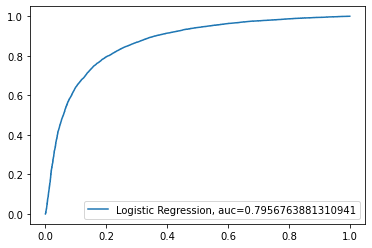

In [97]:
y_pred_proba = lr_grid.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="Logistic Regression, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Further Work